Dataset Overview:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Summary Statistics:
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

Missing Values:
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales     

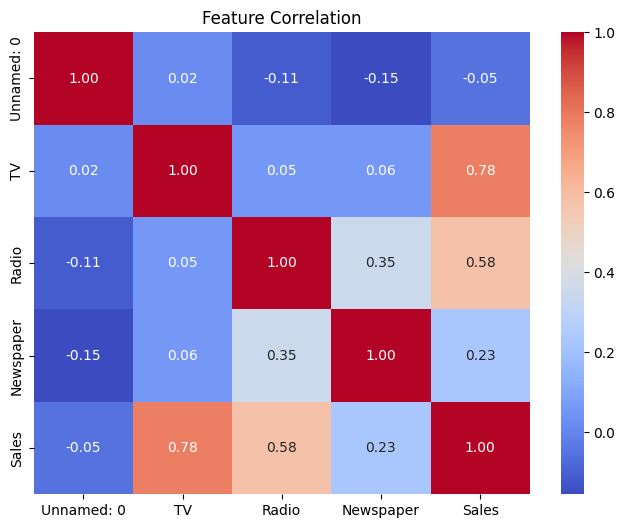


Model Performance:
                      Model  Mean Squared Error  Mean Absolute Error  \
0         Linear Regression            3.174097             1.460757   
1          Ridge Regression            3.174095             1.460766   
2          Lasso Regression            3.143692             1.452202   
3             Decision Tree            2.175000             0.985000   
4             Random Forest            0.590732             0.620100   
5         Gradient Boosting            0.532582             0.618742   
6  Support Vector Regressor            4.006045             1.514358   
7       K-Nearest Neighbors            2.821140             1.189000   

   R² Score (CV Mean)  R² Score (Test)  
0            0.859488         0.899438  
1            0.859490         0.899438  
2            0.861699         0.900401  
3            0.937992         0.931091  
4            0.969167         0.981284  
5            0.969725         0.983127  
6            0.767666         0.873080  
7  

<ipython-input-1-85b255a9f256>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R² Score (Test)", y="Model", data=results_df.sort_values(by="R² Score (Test)", ascending=False), palette="viridis")


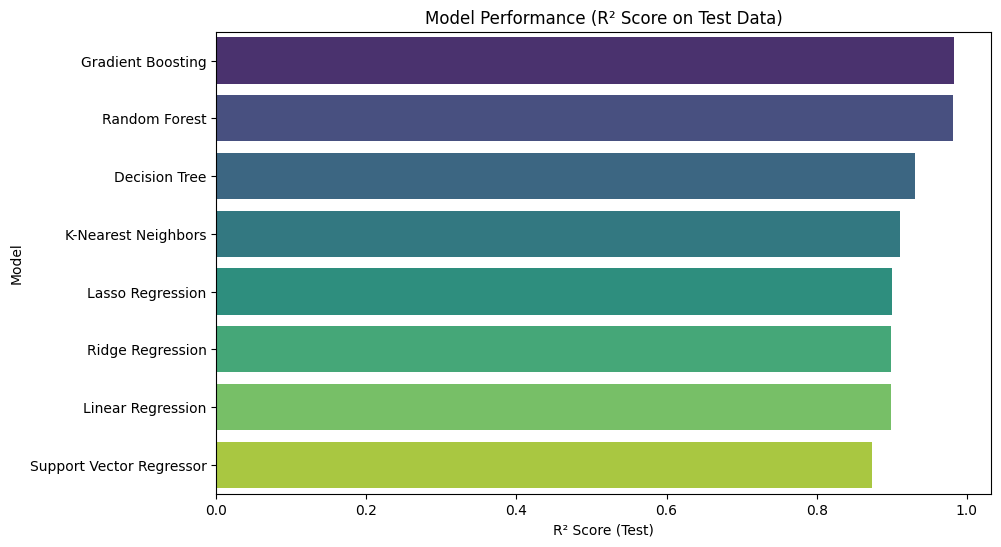

<ipython-input-1-85b255a9f256>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")


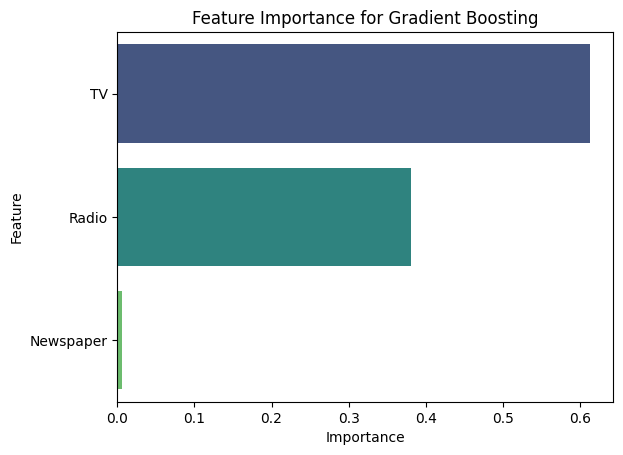

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

# Load the dataset
file_path = '/content/drive/MyDrive/Advertising.csv'
data = pd.read_csv(file_path)

# Exploratory Data Analysis
print("Dataset Overview:")
print(data.head())
print("\nSummary Statistics:")
print(data.describe())
print("\nMissing Values:")
print(data.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()

# Prepare the data
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to train
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Train, evaluate, and validate models
results = []
for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({
        "Model": name,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "R² Score (CV Mean)": cv_scores.mean(),
        "R² Score (Test)": r2
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nModel Performance:")
print(results_df)

# Plot R² Scores
plt.figure(figsize=(10, 6))
sns.barplot(x="R² Score (Test)", y="Model", data=results_df.sort_values(by="R² Score (Test)", ascending=False), palette="viridis")
plt.title("Model Performance (R² Score on Test Data)")
plt.show()

# Feature Importance for the best model
best_model_name = results_df.sort_values(by="R² Score (Test)", ascending=False).iloc[0]['Model']
best_model = models[best_model_name]
if hasattr(best_model, 'feature_importances_'):  # Tree-based models
    importance = best_model.feature_importances_
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")
    plt.title(f"Feature Importance for {best_model_name}")
    plt.show()
else:  # Permutation Importance for non-tree models
    perm_importance = permutation_importance(best_model, X_test, y_test, random_state=42)
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': perm_importance.importances_mean})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")
    plt.title(f"Feature Importance for {best_model_name} (Permutation Importance)")
    plt.show()